# Base Alloctaion Algorithm
### Steps
- open image
- change the image settings like brightness...
- threshold the image and count the stars
- change the settings until only one star left
- calculate the star position reletive to the center of the image

In [31]:
import cv2
import numpy as np
import pandas as pd
import sys
import time
from tqdm import tqdm_notebook

sys.path.insert(1, r'C:\Users\Mario\Downloads\DATA_ANALISSES\Useful_codes')

from  Draw_frames_in_matplotlib import *

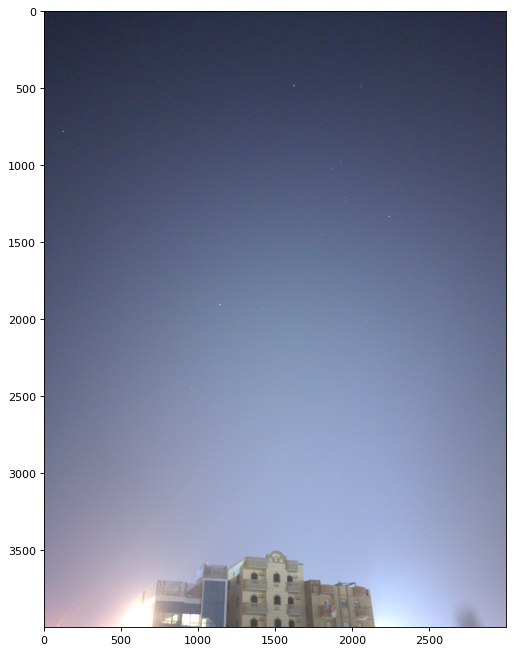

(4000, 3000, 3)


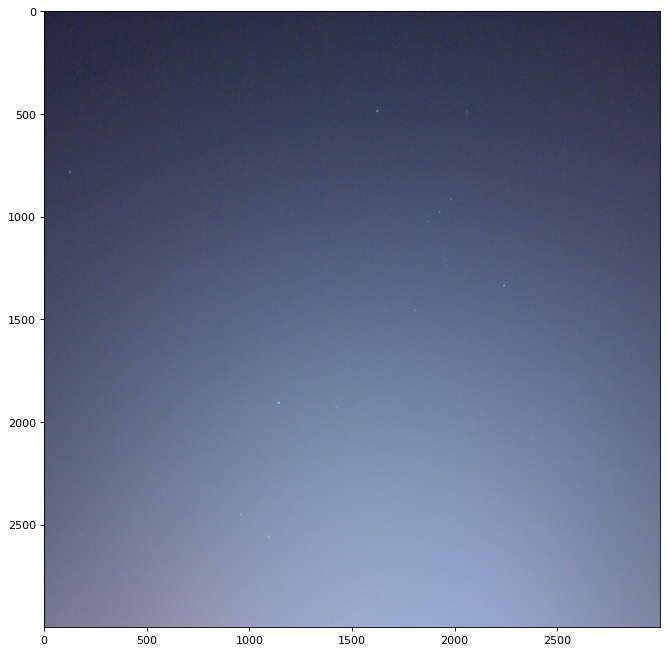

(3000, 3000, 3)


In [32]:
img = cv2.imread(r'test_data/0.jpg')
showimg(img,'rgb')
print(img.shape)
img2 = img[:3000,:,:]
showimg(img2,'rgb')
print(img2.shape)

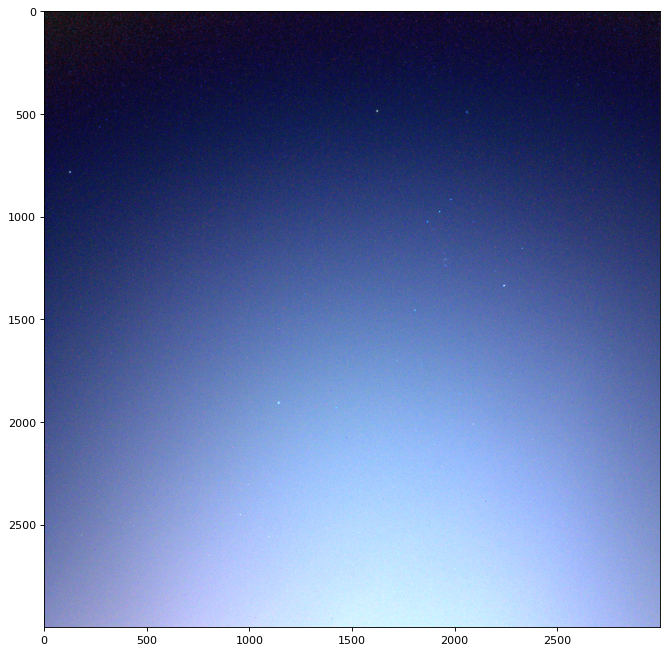

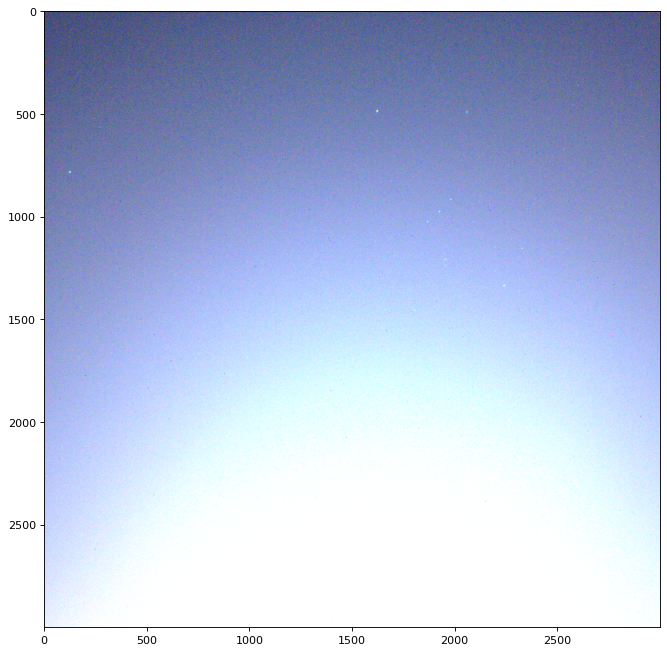

In [60]:

alpha = 2 # Contrast control
beta = -100 # Brightness control
adjusted = cv2.convertScaleAbs(img2, alpha=alpha, beta=beta)


contrast = 2 # Contrast control ( 0 to 127)
brightness = .01 # Brightness control (0-100)
out = cv2.addWeighted( img2, contrast, img2, 0, brightness)

showimg(adjusted)   
showimg(out)   

## Looking for stars in image

In [34]:
########### 
def find_stars(res_img,i,j,new_frame_di,mean_factor=1.17,std_factor=1):
        """takes img of stars, i and j croping points, the small frame dimention to 
        crop the image into small frames, and mean and std factors = how tolarant 
        do you want the threshhold to be

        this function crops the image into small pieces based on the size you give it 
        then takes the mean of the pixels in this small area and standard deviation to 
        find if any thing is poping out and makes it a 1 indictating a star and all the
        other pixels are 0 indicating that there is no star here

        outputs a frame with map of stars in this frame
        """


        return np.clip(cv2.threshold(res_img[i*new_frame_di:(i+1)*new_frame_di,(j)*new_frame_di:(j+1)*
                                                new_frame_di], mean_factor*np.mean(
                res_img[i*new_frame_di:(i+1)*new_frame_di,
                        (j)*new_frame_di:(j+1)*new_frame_di])+ std_factor*np.
                                std(res_img[i*new_frame_di:(i+1)*new_frame_di,(j)*new_frame_di:(j+1)*
                                                new_frame_di]),
                                        255, cv2.THRESH_BINARY)[1],0,1)
        


In [35]:
def find_stars2(res_img,crop_times,mean_factor=1.17,std_factor=1):
        """
        takes gray 1:1 img of stars, crop times and mean and std factors = how tolarant 
        do you want the threshhold to be

        this function crops the image into small pieces based on the size you give it 
        then takes the mean of the pixels in this small area and standard deviation to 
        find if any thing is poping out and makes it a 1 indictating a star and all the
        other pixels are 0 indicating that there is no star here

        outputs a map of stars in the full image
        """

        x = res_img.shape[0]
        y = res_img.shape[1]

        if x !=y :
                print("Sorry, a square image is required")
                return 0
        

        
        new_frame_di = int(x/crop_times)
        stars_map = np.zeros([new_frame_di*crop_times,new_frame_di*crop_times])

        for i in range(crop_times):
                for j in range(crop_times):
                        # print(i,j,new_frame_di)


                        stars_map[i*new_frame_di:(i+1)*new_frame_di,(j)*new_frame_di:(j+1)*new_frame_di] =cv2.threshold(res_img[i*new_frame_di:(i+1)*new_frame_di,(j)*new_frame_di:(j+1)*
                                                                new_frame_di], mean_factor*np.mean(
                                res_img[i*new_frame_di:(i+1)*new_frame_di,
                                        (j)*new_frame_di:(j+1)*new_frame_di])+ std_factor*np.
                                                std(res_img[i*new_frame_di:(i+1)*new_frame_di,(j)*new_frame_di:(j+1)*
                                                                new_frame_di]),
                                                        255, cv2.THRESH_BINARY)[1]


        return np.clip(stars_map,0,1)

In [36]:
def find_stars3(res_img,crop_times,mean_factor=1.17,std_factor=1):
        """
        takes gray 1:1 img of stars, crop times and mean and std factors = how tolarant 
        do you want the threshhold to be

        this function crops the image into small pieces based on the size you give it 
        then takes the mean of the pixels in this small area and standard deviation to 
        find if any thing is poping out and makes it a 1 indictating a star and all the
        other pixels are 0 indicating that there is no star here

        outputs a map of stars in the full image
        """

        x = res_img.shape[0]
        y = res_img.shape[1]

        if x !=y :
                print("Sorry, a square image is required")
                return 0
        

        
        new_frame_di = int(x/crop_times)
        stars_map = np.zeros([new_frame_di*crop_times,new_frame_di*crop_times])

        steps = [ i*new_frame_di  for i in range(crop_times)]

        for i in steps:
                for j in steps:
                        frame = res_img[i:i+new_frame_di,j:j+new_frame_di]


                        stars_map[i:i+new_frame_di,j:j+new_frame_di] =cv2.threshold(frame, mean_factor*np.mean(frame)+ std_factor*np.std(frame),255, cv2.THRESH_BINARY)[1]


        return np.clip(stars_map,0,1)

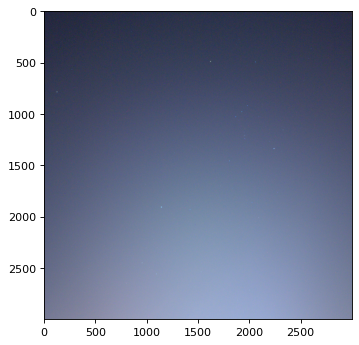

In [37]:
showimg(img2,size=(5, 5))

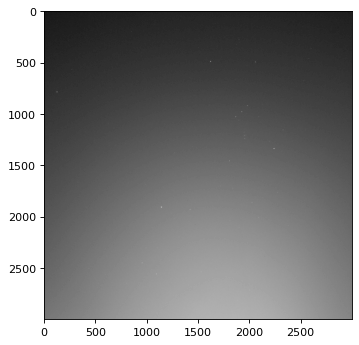

In [38]:
gray = cv2.cvtColor(img2[:,:,[2,1,0]], cv2.COLOR_BGR2GRAY)

showimg(gray,'g',size=(5, 5))

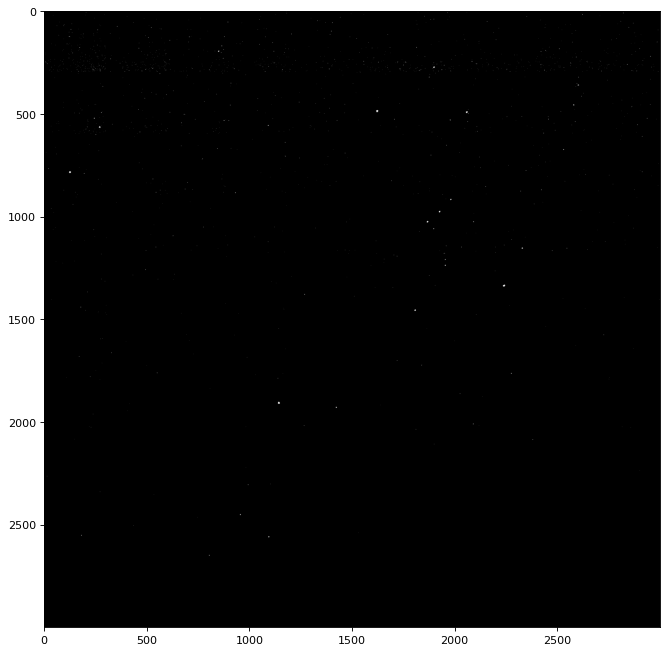

In [40]:
star_map2 = find_stars3(gray,crop_times=10)
showimg(star_map1,'g')

#### more reasonable to give the functions a kernal size not number of divisions

In [42]:
def find_stars4(res_img,kernal_di=9,mean_factor=1.17,std_factor=1):
        """
        takes gray 1:1 img of stars, kernal_di in pixels and mean and std factors = 
        how tolarant do you want the threshhold to be

        this function crops the image into small pieces based on the size you give it 
        then takes the mean of the pixels in this small area and standard deviation to 
        find if any thing is poping out and makes it a 1 indictating a star and all the
        other pixels are 0 indicating that there is no star here

        outputs a map of stars in the full image
        """

        x = res_img.shape[0]
        y = res_img.shape[1]

        if x !=y :
                print("Sorry, a square image is required")
                return 0
        

        crop_times =int (x/kernal_di)
        stars_map = np.zeros([kernal_di*crop_times,kernal_di*crop_times])

        steps = [ i*kernal_di  for i in range(crop_times)]

        for i in steps:
                for j in steps:
                        frame = res_img[i:i+kernal_di,j:j+kernal_di]


                        stars_map[i:i+kernal_di,j:j+kernal_di] =cv2.threshold(frame, mean_factor*np.mean(frame)+ std_factor*np.std(frame),255, cv2.THRESH_BINARY)[1]


        return np.clip(stars_map,0,1)

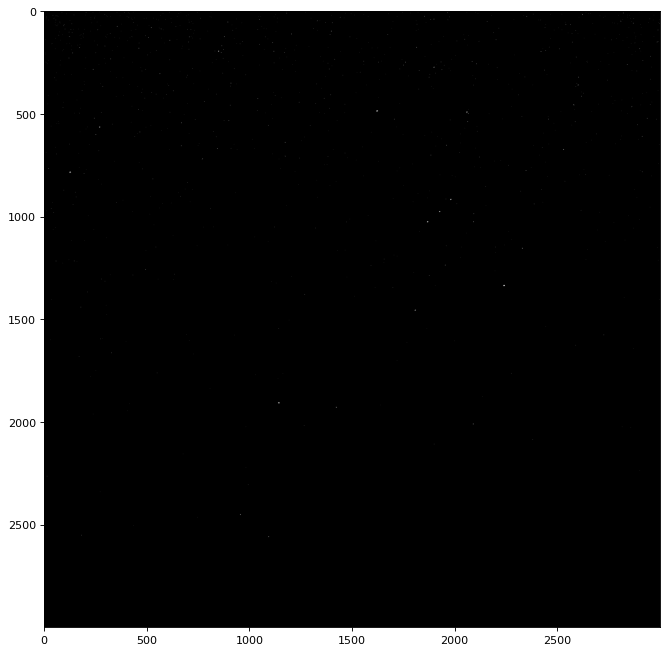

In [43]:
star_map3 = find_stars4(gray,kernal_di=10)
showimg(star_map3,'g')

In [51]:
print('Number of Light pixels in the map:', len(star_map3[star_map3==1]))
print('Number of Dark pixels in the map:', len(star_map3[star_map3==0] ))

Number of Light pixels in the map: 1833
Number of Dark pixels in the map: 8998167


##### I don't think we have 1833 stars in this image. 
##### We have a map of stars in the image but we need to count the stars not the pixels 

## Count stars in image

Most simple way to do it, count all the ones but check if a 1 is connected to any other 1s don't count the other 1s